In [232]:
import numpy as np
import pandas as pd

In [233]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv'

In [234]:
import os

filename = data.split('/')[-1]

if os.path.exists(filename):
    print("File already exists.")
else:
    !wget $data

File already exists.


In [235]:
df = pd.read_csv(filename)
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [236]:
df.columns

Index(['Laptop', 'Status', 'Brand', 'Model', 'CPU', 'RAM', 'Storage',
       'Storage type', 'GPU', 'Screen', 'Touch', 'Final Price'],
      dtype='object')

In [237]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.columns

Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')

In [238]:
for col in df.columns[df.dtypes == 'object']:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [239]:
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,asus_expertbook_b1_b1502cba-ej0436x_intel_core...,new,asus,expertbook,intel_core_i5,8,512,ssd,NaN,15.6,no,1009.00
1,alurin_go_start_intel_celeron_n4020/8gb/256gb_...,new,alurin,go,intel_celeron,8,256,ssd,NaN,15.6,no,299.00
2,asus_expertbook_b1_b1502cba-ej0424x_intel_core...,new,asus,expertbook,intel_core_i3,8,256,ssd,NaN,15.6,no,789.00
3,msi_katana_gf66_12uc-082xes_intel_core_i7-1270...,new,msi,katana,intel_core_i7,16,1000,ssd,rtx_3050,15.6,no,1199.00
4,hp_15s-fq5085ns_intel_core_i5-1235u/16gb/512gb...,new,hp,15s,intel_core_i5,16,512,ssd,NaN,15.6,no,669.01


### Exploratory Data Analysis (EDA)

In [240]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

laptop
['asus_expertbook_b1_b1502cba-ej0436x_intel_core_i5-1235u/8gb/512gb_ssd/15.6"'
 'alurin_go_start_intel_celeron_n4020/8gb/256gb_ssd/15.6"'
 'asus_expertbook_b1_b1502cba-ej0424x_intel_core_i3-1215u/8gb/256gb_ssd/15.6"'
 'msi_katana_gf66_12uc-082xes_intel_core_i7-12700h/16gb/1tb_ssd/rtx3050/15.6"'
 'hp_15s-fq5085ns_intel_core_i5-1235u/16gb/512gb_ssd/15.6"']
2160

status
['new' 'refurbished']
2

brand
['asus' 'alurin' 'msi' 'hp' 'lenovo']
27

model
['expertbook' 'go' 'katana' '15s' 'crosshair']
121

cpu
['intel_core_i5' 'intel_celeron' 'intel_core_i3' 'intel_core_i7'
 'amd_ryzen_5']
28

ram
[ 8 16 32 12  4]
9

storage
[ 512  256 1000   64  128]
12

storage_type
['ssd' 'emmc' nan]
2

gpu
[nan 'rtx_3050' 'rtx_4060' 'rtx_4050' 'rtx_3060']
44

screen
[15.6 17.3 14.  16.1 13.3]
29

touch
['no' 'yes']
2

final_price
[1009.    299.    789.   1199.    669.01]
1440



In [241]:
filtered_cols = ['ram', 'storage', 'screen', 'final_price']
df_filtered = df[filtered_cols]
df_filtered.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


In [242]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='final_price', ylabel='Count'>

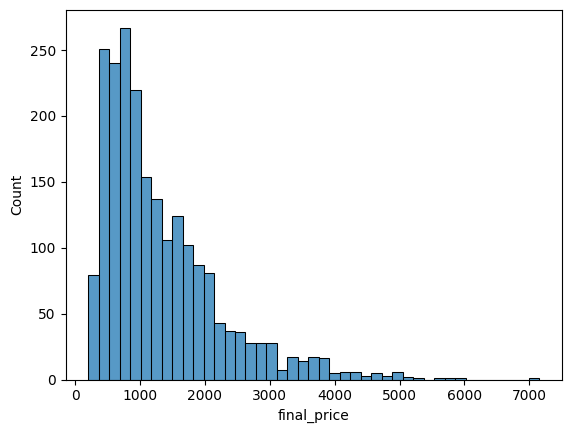

In [243]:
sns.histplot(df_filtered['final_price'])

In [244]:
# Despite the presence of a long tail in final_price, the homework does not require using logarithm to alleviate this.
# sns.histplot(np.log1p(df_filtered.final_price))

#### Question 1: 
There's one column with missing values. What is it?

In [245]:
df_filtered.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

#### Question 2

What's the median (50% percentile) for variable 'ram'?

In [246]:
df_filtered.ram.median()

np.float64(16.0)

### Data Splitting

In [247]:
np.random.seed(42)
idx = np.arange(len(df_filtered))
print(idx)

np.random.shuffle(idx)
print(idx)

[   0    1    2 ... 2157 2158 2159]
[2079  668 2073 ... 1130 1294  860]


In [248]:
n = len(df_filtered)
n_train = int(0.6 * n)
n_val = int(0.2 * n)
n_test = n - n_train - n_val

print(n)
print(n_train + n_val + n_test)
print(n_train , n_val , n_test)

2160
2160
1296 432 432


In [249]:
df_train = df_filtered.iloc[idx[:n_train]]
df_val = df_filtered.iloc[idx[n_train:n_train+n_val]]
df_test = df_filtered.iloc[idx[n_train+n_val:]]

In [250]:
len(df_train), len(df_val), len(df_test)

(1296, 432, 432)

In [251]:
df_train.head()

,ram,storage,screen,final_price
2079,32,1000,15.6,1123.29
668,4,64,14.1,201.05
2073,32,1000,14.0,997.74
1113,16,512,13.3,1016.00
788,32,1000,16.0,2739.00


In [252]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [253]:
df_train.head()

,ram,storage,screen,final_price
0,32,1000,15.6,1123.29
1,4,64,14.1,201.05
2,32,1000,14.0,997.74
3,16,512,13.3,1016.00
4,32,1000,16.0,2739.00


In [254]:
# y_train = np.log1p(df_train.final_price.values)
# y_val = np.log1p(df_val.final_price.values)
# y_test = np.log1p(df_filtered.final_price.values)
y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_filtered.final_price.values

In [255]:
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

### Missing Values
Question 3 Taken care of by filling in with zeros

In [256]:
screen_mean = np.mean(df_train.screen)

def prepare_X(df, fill=0):
    df = df.copy()
    X = df.fillna(fill).values
    return X

In [257]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_all = XTX_inv.dot(X.T).dot(y)

    return w_all[0], w_all[1:]

In [258]:
def rmse(y, y_pred):
    squared = (y - y_pred) ** 2
    return np.sqrt(np.mean(squared))

Fill with Zero

In [259]:
X_train = prepare_X(df_train, fill = 0)
w0 , w = train_linear_regression(X_train, y_train)


X_val = prepare_X(df_val, fill = 0)
y_pred = w0 + X_val.dot(w)

score = rmse(y_val, y_pred)
np.round(score, 2)

np.float64(597.36)

Fill with mean

In [260]:
X_train = prepare_X(df_train, fill = screen_mean)
w0 , w = train_linear_regression(X_train, y_train)


X_val = prepare_X(df_val, fill = screen_mean)
y_pred = w0 + X_val.dot(w)

score = rmse(y_val, y_pred)
np.round(score,2)

np.float64(600.27)

In [261]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_all = XTX_inv.dot(X.T).dot(y)
    
    return w_all[0], w_all[1:]

In [262]:
reg = [0, 0.01, 0.1, 1, 10, 100]

X_train = prepare_X(df_train, fill = 0)
X_val = prepare_X(df_val, fill = 0)

for r in reg:
    w0, w = train_linear_regression_reg(X_train, y_train, r)

    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    print(r, w0, np.round(score, 2))

0 676.8954853003995 597.36
0.01 676.2736817205587 597.36
0.1 670.7284836314063 597.35
1 619.9030834108207 597.21
10 352.79713367679835 597.06
100 66.92071440181994 597.9


r = 10 gives the best rmse.

#### Question 5

In [263]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_scores = []

for seed in seeds:
    np.random.seed(seed)
    idx = np.arange(len(df_filtered))
    np.random.shuffle(idx)

    df_train = df_filtered.iloc[idx[:n_train]]
    df_val = df_filtered.iloc[idx[n_train:n_train+n_val]]
    df_test = df_filtered.iloc[idx[n_train+n_val:]]

    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    # y_train = np.log1p(df_train.final_price.values)
    # y_val = np.log1p(df_val.final_price.values)
    # y_test = np.log1p(df_filtered.final_price.values)
    y_train = (df_train.final_price.values)
    y_val = (df_val.final_price.values)
    y_test = (df_filtered.final_price.values)

    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']

    X_train = prepare_X(df_train, fill = 0)
    w0 , w = train_linear_regression(X_train, y_train)

    X_val = prepare_X(df_val, fill = 0)
    y_pred = w0 + X_val.dot(w)


    # y_val = np.expm1(y_val)
    # y_pred = np.expm1(y_pred)

    score = rmse(y_val, y_pred)
    rmse_scores.append(score)

In [264]:
rmse_scores = np.array(rmse_scores)
std = np.std(rmse_scores)
round(std, 3)

np.float64(29.176)

#### Question 6

In [268]:
np.random.seed(9)
idx = np.arange(len(df_filtered))
np.random.shuffle(idx)

df_train = df_filtered.iloc[idx[:n_train]]
df_val = df_filtered.iloc[idx[n_train:n_train+n_val]]
df_test = df_filtered.iloc[idx[n_train+n_val:]]

df_full_train = pd.concat([df_train, df_val])

df_full_train = df_full_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = (df_train.final_price.values)
y_val = (df_val.final_price.values)
y_full_train = np.concatenate([y_train, y_val])

y_test = (df_test.final_price.values)

del df_test['final_price']
del df_full_train['final_price']

X_full_train = prepare_X(df_full_train, fill = 0)
w0 , w = train_linear_regression(X_full_train, y_full_train)

X_test = prepare_X(df_test, fill = 0)
y_pred = w0 + X_test.dot(w)

score = rmse(y_test, y_pred)
print(round(score, 2))

608.61
